## Udy et al - fire paper - Figure 4 & 5 - Timeseries plot of FFDI observations and FFDI predictions - full 2k period - local records - NRM rainfall recon - PDSI ANZDA recon

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy as cart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from pathlib import Path


%matplotlib inline

In [2]:
#read csv - combined JanYearCE + LDsss + FFDI prediction + FFDI observations
#dataset published in Australian Antarctic Data Centre
df2k_obs_lr = pd.read_csv('Udy_et_al_2024_SEAus_FFDI_2k_reconstruction_using_LDsss.csv')
#df2k_obs_lr


## Calculate means over different time periods

In [9]:
#calculate mean for observation and predictions over climatology period
obs_mean_1960_1990 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1960) & (df2k_obs_lr['Year_CE']<=1990), 'FFDI_obs_area_avg'].mean()
pred_mean_1960_1990 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1960) & (df2k_obs_lr['Year_CE']<=1990), 'FFDI_prediction_R'].mean()
obs_sd_1960_1990 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1960) & (df2k_obs_lr['Year_CE']<=1990), 'FFDI_obs_area_avg'].std()


obs_mean_1950_2016 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1950) & (df2k_obs_lr['Year_CE']<=2016), 'FFDI_obs_area_avg'].mean()
pred_mean_1950_2016 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1950) & (df2k_obs_lr['Year_CE']<=2016), 'FFDI_prediction_R'].mean()

obs_mean_1950_2020 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1950) & (df2k_obs_lr['Year_CE']<=2020), 'FFDI_obs_area_avg'].mean()

print(obs_mean_1960_1990, pred_mean_1960_1990,obs_mean_1950_2016,pred_mean_1950_2016,obs_mean_1950_2020 )

7.130459423516128 7.130459423516129 7.435377147515151 7.015630819999999 7.678863892085713


In [11]:
#calculate mean & +1sd over different periods

#IPCC pre-industrial periods
pred_mean_1850_1900 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1850) & (df2k_obs_lr['Year_CE']<=1990), 'FFDI_prediction_R'].mean()
pred_sd_1850_1900 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1850) & (df2k_obs_lr['Year_CE']<=1990), 'FFDI_prediction_R'].std()

#full 2k period
pred_mean_0_2016 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=0) & (df2k_obs_lr['Year_CE']<=2016), 'FFDI_prediction_R'].mean()
pred_sd_0_2016 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=0) & (df2k_obs_lr['Year_CE']<=2016), 'FFDI_prediction_R'].std()

#470-500
pred_mean_470_500 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=470) & (df2k_obs_lr['Year_CE']<=500), 'FFDI_prediction_R'].mean()
pred_sd_470_500 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=470) & (df2k_obs_lr['Year_CE']<=500), 'FFDI_prediction_R'].std()

#1100-1250
pred_mean_1100_1250 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1100) & (df2k_obs_lr['Year_CE']<=1250), 'FFDI_prediction_R'].mean()
pred_sd_1100_1250 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1100) & (df2k_obs_lr['Year_CE']<=1250), 'FFDI_prediction_R'].std()

#1900 - 2016
pred_mean_1900_2016 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1900) & (df2k_obs_lr['Year_CE']<=2016), 'FFDI_prediction_R'].mean()
pred_sd_1900_2016 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=1900) & (df2k_obs_lr['Year_CE']<=2016), 'FFDI_prediction_R'].std()

#0-1900
pred_mean_0_1900 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=0) & (df2k_obs_lr['Year_CE']<=1900), 'FFDI_prediction_R'].mean()
pred_sd_0_1900 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=0) & (df2k_obs_lr['Year_CE']<=1900), 'FFDI_prediction_R'].std()

#0-1250
pred_mean_0_1250 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=0) & (df2k_obs_lr['Year_CE']<=1250), 'FFDI_prediction_R'].mean()
pred_sd_0_1250 = df2k_obs_lr.loc[(df2k_obs_lr['Year_CE']>=0) & (df2k_obs_lr['Year_CE']<=1250), 'FFDI_prediction_R'].std()


print(pred_mean_1850_1900,pred_mean_0_2016,pred_mean_470_500,pred_mean_1100_1250,pred_mean_1900_2016,pred_mean_0_1900, pred_mean_0_1250)

6.4346008765531915 6.196731229209754 7.30612559332258 7.15763302874 6.81481283251282 6.153754838925182 6.2127684840949575


## Firepaper - 2k - Fire weather reconstruction with 30yr Loess filter

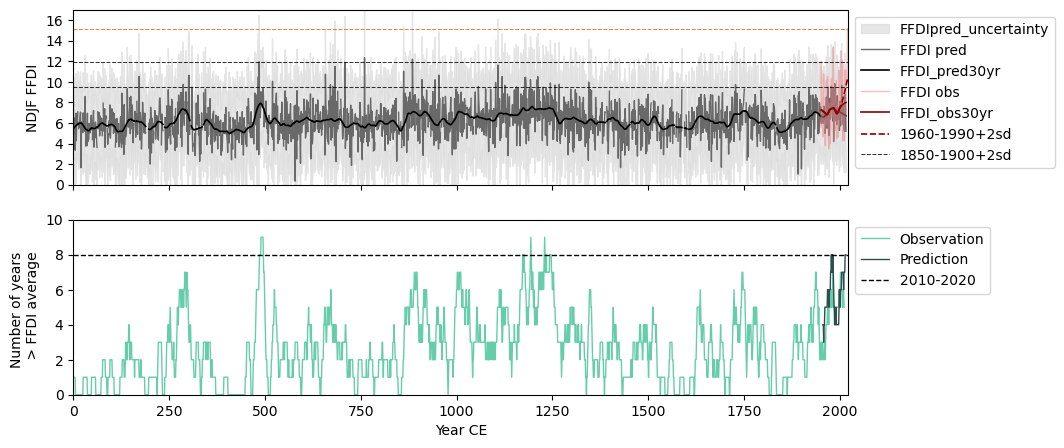

In [12]:
fig,axs = plt.subplots(2, sharex = True, figsize = (10,5))

#Define variables
Year = df2k_obs_lr['Year_CE']
## FFDI
#annual obs / prediction
FFDI_pred_R = df2k_obs_lr['FFDI_prediction_R'] #NDJF_FFDI_prediction_1960_1990_model
FFDI_obs = df2k_obs_lr['FFDI_obs_area_avg']

#95% prediction confidence interval
FFDI_pred_lwr = df2k_obs_lr['FFDI_pred_lwr']
FFDI_pred_upr = df2k_obs_lr['FFDI_pred_upr']

#Loess filter - 30year
FFDI_pred_30yr = df2k_obs_lr['30yrLoess_predR_2k']
FFDI_obs_30yr_to2020 = df2k_obs_lr['30yrLoess_obs_1951_2022'] #typo - to 2020 actually
FFDI_obs_30yr_to2016 = df2k_obs_lr['30yrLoess_obs_1951_2016']

## FFDI freq / number - table updated to be count but name still the same
FFDI_11yr_freq_pred = df2k_obs_lr['FFDI_pc_11yr_over_avg_pred'] #count 
FFDI_11yr_freq_obs = df2k_obs_lr['FFDI_pc_11yr_over_avg_obs']

axs[0].fill_between(Year, FFDI_pred_lwr, FFDI_pred_upr, color = 'gainsboro', alpha = 0.7)
axs[0].plot(Year, FFDI_pred_R, color='dimgrey', linewidth=1)
axs[0].plot(Year, FFDI_pred_30yr, color='black', linewidth=1.2)

axs[0].plot(Year, FFDI_obs, color='lightcoral', linewidth=1, alpha = 0.5)
axs[0].plot(Year, FFDI_obs_30yr_to2016, color='darkred', linewidth=1.2)
axs[0].plot(Year, FFDI_obs_30yr_to2020, color='darkred', linewidth=1.2, linestyle = 'dashed' )

#Frequency pc
axs[1].plot(Year, FFDI_11yr_freq_pred, color='mediumaquamarine', linewidth=1)
axs[1].plot(Year, FFDI_11yr_freq_obs, color='darkslategrey', linewidth=1)

#add x/y labels
axs[0].set_ylabel('NDJF FFDI')
axs[1].set_ylabel('Number of years \n > FFDI average')

axs[1].set_xlabel('Year CE')

#set y lim
axs[0].set_ylim([0,17])
axs[0].yaxis.set_ticks(np.arange(0,17,2))
#axs[1].set_ylim([0,100])
axs[1].set_ylim([0,10])


#add mean + sd
#1960-1990 mean (observations) - similar to prediction
axs[0].axhline(y = obs_mean_1960_1990 + 2*obs_sd_1960_1990 , linewidth = 0.75, linestyle = 'dashed', color = 'black', alpha = 0.8)
axs[0].axhline(y = pred_mean_1850_1900 + 2* pred_sd_1850_1900, linewidth = 0.75, linestyle = 'dashed', color = 'black', alpha = 0.8)
#2019/20 magnitude
axs[0].axhline(y = 15.12, linewidth = 0.75, linestyle = 'dashed', color = 'chocolate', alpha = 0.8)

#2010 - 2020 % above 1960 - 1990 average
axs[1].axhline(y = 72.7*11/100, linewidth = 1, linestyle = 'dashed', color = 'black')

axs[0].legend(['FFDIpred_uncertainty','FFDI pred','FFDI_pred30yr','FFDI obs', 'FFDI_obs30yr','1960-1990+2sd','1850-1900+2sd'],bbox_to_anchor = (1,1),loc = 'upper left' ) #place legend outside plot
axs[1].legend(['Observation', 'Prediction','2010-2020'],bbox_to_anchor = (1,1),loc = 'upper left' )

    
plt.xlim(0,2022)

plt.savefig('LDsss2k_FFDI_mag_freq_prediction_obs_30yr_loess_withNanYears_FFDIPred_uncertainty_range.jpg')
plt.savefig('LDsss2k_FFDI_mag_freq_prediction_obs_30yr_loess_withNanYears_FFDIPred_uncertainty_range.pdf')
plt.show()

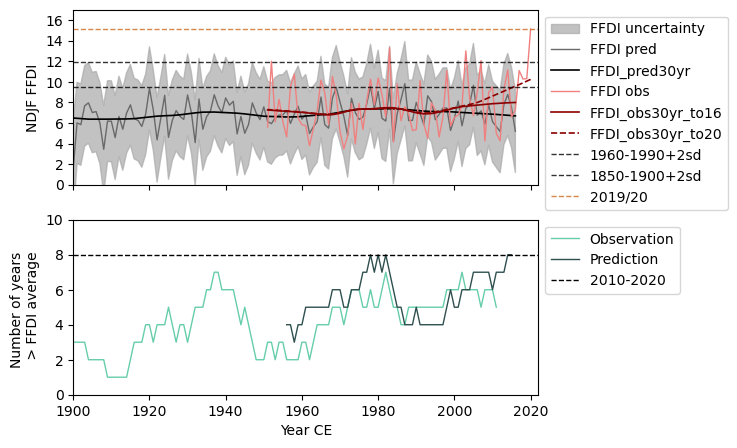

In [16]:
#Observation period - 1900 - 2020 - subset of reconstruction figure - Loess filter
fig,axs = plt.subplots(2, sharex = True, figsize = (6,5))

Year = df2k_obs_lr['Year_CE']

## FFDI
#annual obs / prediction
FFDI_pred_R = df2k_obs_lr['FFDI_prediction_R'] #NDJF_FFDI_prediction_1960_1990_model
FFDI_obs = df2k_obs_lr['FFDI_obs_area_avg']

#95% prediction confidence interval
FFDI_pred_lwr = df2k_obs_lr['FFDI_pred_lwr']
FFDI_pred_upr = df2k_obs_lr['FFDI_pred_upr']

#Loess filter - 30year
FFDI_pred_30yr = df2k_obs_lr['30yrLoess_predR_2k']
FFDI_obs_30yr_to2020 = df2k_obs_lr['30yrLoess_obs_1951_2022'] #typo - to 2020 actually
FFDI_obs_30yr_to2016 = df2k_obs_lr['30yrLoess_obs_1951_2016']

## FFDI freq / number - table updated to be count but name still the same
FFDI_11yr_freq_pred = df2k_obs_lr['FFDI_pc_11yr_over_avg_pred'] #count 
FFDI_11yr_freq_obs = df2k_obs_lr['FFDI_pc_11yr_over_avg_obs']

# Plot data

#FFDI mag

axs[0].fill_between(Year, FFDI_pred_lwr, FFDI_pred_upr,color='darkgrey', alpha = 0.7)
axs[0].plot(Year, FFDI_pred_R, color='dimgrey', linewidth=1)
axs[0].plot(Year, FFDI_pred_30yr, color='black', linewidth=1.2)

axs[0].plot(Year, FFDI_obs, color='lightcoral', linewidth=1)
axs[0].plot(Year, FFDI_obs_30yr_to2016, color='darkred', linewidth=1.2)
axs[0].plot(Year, FFDI_obs_30yr_to2020, color='darkred', linewidth=1.2, linestyle = 'dashed' )


#number of years

axs[1].plot(Year, FFDI_11yr_freq_pred, color='mediumaquamarine', linewidth=1)
axs[1].plot(Year, FFDI_11yr_freq_obs, color='darkslategrey', linewidth=1)



#add mean + sd
#1960-1990 mean (observations) - similar to prediction
axs[0].axhline(y = obs_mean_1960_1990 + 2*obs_sd_1960_1990 , linewidth = 1,linestyle = 'dashed', color = 'black', alpha = 0.8)

#IPCC pre-industrial
axs[0].axhline(y = pred_mean_1850_1900 + 2* pred_sd_1850_1900, linewidth = 1, linestyle = 'dashed', color = 'black', alpha = 0.8)

#2019/20 season 
axs[0].axhline(y = 15.12, linewidth = 1, linestyle = 'dashed', color = 'chocolate', alpha = 0.8)

#2010 - 2020 % above 1960 - 1990 average
axs[1].axhline(y = 8, linewidth = 1, linestyle = 'dashed', color = 'black')

axs[0].legend(['FFDI uncertainty', 'FFDI pred', 'FFDI_pred30yr','FFDI obs','FFDI_obs30yr_to16','FFDI_obs30yr_to20','1960-1990+2sd','1850-1900+2sd','2019/20'],bbox_to_anchor = (1,1),loc = 'upper left' ) #place legend outside plot
axs[1].legend(['Observation', 'Prediction','2010-2020'],bbox_to_anchor = (1,1),loc = 'upper left' )

axs[1].set_xlabel('Year CE')
axs[0].set_ylabel('NDJF FFDI')
axs[1].set_ylabel('Number of years \n > FFDI average')

#set y lim
axs[0].set_ylim([0,17])
axs[0].yaxis.set_ticks(np.arange(0,17,2))
axs[1].set_ylim([0,10])

plt.xlim(1900,2022)

plt.savefig('LDsss_2k_FFDI_mag_freq_prediction_obs_withNanYears_FFDIPred_uncertainty_range_obs_1900_2020.jpg')
plt.savefig('LDsss_2k_FFDI_mag_freq_prediction_obs_withNanYears_FFDIPred_uncertainty_range_obs_1900_2020.pdf')
plt.show()

## Firepaper - Comparison with local records

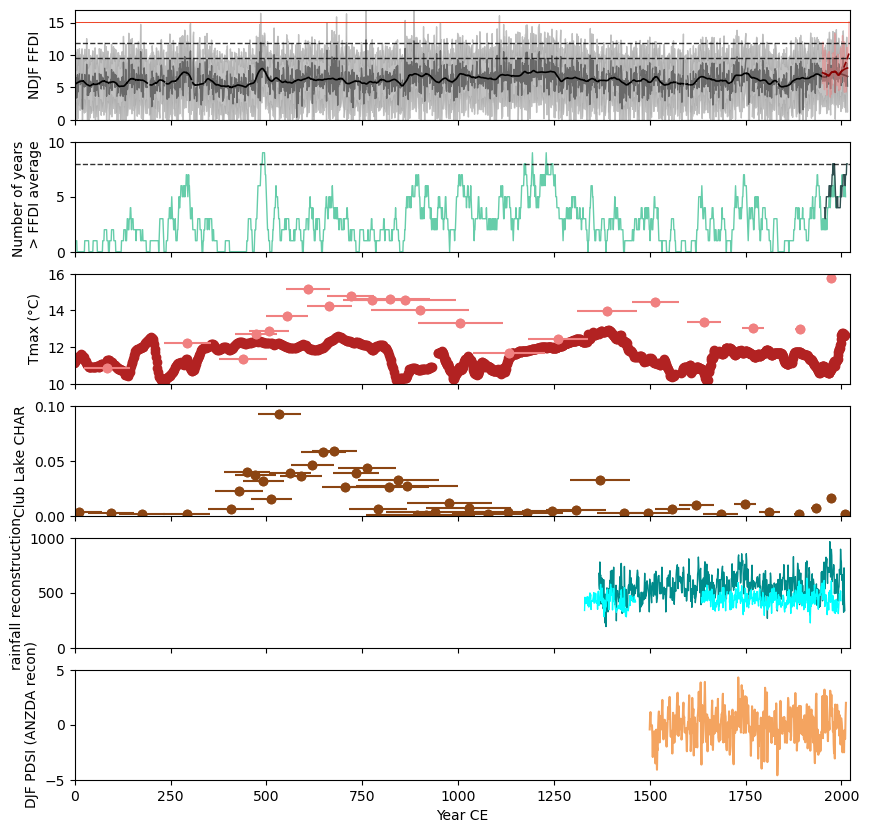

In [17]:
#Stacked plot with local records

fig,axs = plt.subplots(6, sharex = True, figsize = (10,10))

Year = df2k_obs_lr['Year_CE']
## FFDI
FFDI_pred = df2k_obs_lr['FFDI_prediction_R'] #NDJF_FFDI_prediction_1960_1990_model
FFDI_obs = df2k_obs_lr['FFDI_obs_area_avg']

#Loess filter - 30year
FFDI_pred_30yr = df2k_obs_lr['30yrLoess_predR_2k']
FFDI_obs_30yr_to2020 = df2k_obs_lr['30yrLoess_obs_1951_2020'] 
FFDI_obs_30yr_to2016 = df2k_obs_lr['30yrLoess_obs_1951_2016']

## FFDI freq
FFDI_11yr_freq_pred = df2k_obs_lr['FFDI_pc_11yr_over_avg_pred'] 
FFDI_11yr_freq_obs = df2k_obs_lr['FFDI_pc_11yr_over_avg_obs'] 


#local records
CL_Temp = df2k_obs_lr['ClubLakeTemperature']
CL_Char = df2k_obs_lr['ClubLakeCHAR']
CabramurraTmax = df2k_obs_lr['CabramurraTmax']
Barr = df2k_obs_lr['Barr2019_rainfall_recon']

# Plot data
#FFDI data - from LDsss reconstruction and observations
axs[0].fill_between(Year, FFDI_pred_lwr, FFDI_pred_upr, color = 'darkgrey', alpha = 0.7)
axs[0].plot(Year, FFDI_pred_R, color='dimgrey', linewidth=1)
axs[0].plot(Year, FFDI_pred_30yr, color='black', linewidth=1.2)

axs[0].plot(Year, FFDI_obs, color='lightcoral', linewidth=1, alpha = 0.5)
axs[0].plot(Year, FFDI_obs_30yr_to2016, color='darkred', linewidth=1.2)
axs[0].plot(Year, FFDI_obs_30yr_to2020, color='darkred', linewidth=1.2, linestyle = 'dashed' )

#number of years
axs[1].plot(Year, FFDI_11yr_freq_pred, color='mediumaquamarine', linewidth=1)
axs[1].plot(Year, FFDI_11yr_freq_obs, color='darkslategrey', linewidth=1)

#local records - scatter for lower resolution
axs[2].scatter(Year, CabramurraTmax, color='firebrick')
axs[2].scatter(Year, CL_Temp, color = 'lightcoral') #put temperature records together
axs[3].scatter(Year, CL_Char, color = 'saddlebrown')

# Freund warm season rainfall reconstruction
EC_rr_recon = df2k_obs_lr['NRM_EC_rr_recon_Freund17']
SS_rr_recon = df2k_obs_lr['NRM_SS_rr_recon_Freund17']
axs[4].plot(Year, EC_rr_recon, color='darkcyan', linewidth=1)
axs[4].plot(Year, SS_rr_recon, color='cyan', linewidth=1)
#axs[4].scatter(Year, Barr, color = 'lightblue')

#PDSI
PDSI_ANZDA = df2k_obs_lr['PDSI_area_average_fire_recon_polygon']
axs[5].plot(Year, PDSI_ANZDA, color = 'sandybrown')

#add error margins for Club Lake
CL_Temp_xerror = df2k_obs_lr['CL_temp_error']
CL_Char_xerror = df2k_obs_lr['CL_CHAR_error']
axs[2].errorbar(Year, CL_Temp,xerr = CL_Temp_xerror, fmt = "o", color = 'lightcoral')
axs[3].errorbar(Year, CL_Char, xerr = CL_Char_xerror, fmt = "o", color = 'saddlebrown')

#add x/y labels
axs[0].set_ylabel('NDJF FFDI')
axs[1].set_ylabel('Number of years \n > FFDI average')
axs[2].set_ylabel('Tmax (°C)')
axs[3].set_ylabel('Club Lake CHAR')
axs[4].set_ylabel('rainfall reconstruction') #warm season
axs[5].set_ylabel('DJF PDSI (ANZDA recon)')

axs[5].set_xlabel('Year CE')

#set y lim
axs[0].set_ylim([0,17])
axs[0].yaxis.set_ticks(np.arange(0,17,5))
axs[1].set_ylim([0,10])
axs[2].set_ylim([10,16])
axs[3].set_ylim([0,0.1])
axs[4].set_ylim([0,1000])
axs[5].set_ylim([-5,5])

#add horizontal lines
axs[0].axhline(y = 15.12, linewidth = 0.75, color = 'red', alpha = 0.8) #2019/20 season average
axs[0].axhline(y = obs_mean_1960_1990 + 2*obs_sd_1960_1990 , linewidth = 1, linestyle = 'dashed', color = 'black', alpha = 0.8)
axs[0].axhline(y = pred_mean_1850_1900 + 2* pred_sd_1850_1900, linewidth = 1, linestyle = 'dashed', color = 'black', alpha = 0.8)
#axs[0].axhline(y = obs_mean_1960_1990 - 2*obs_sd_1960_1990 , linewidth = 1, linestyle = 'dashed', color = 'darkred')

#2010 - 2020 % above 1960 - 1990 average
axs[1].axhline(y = 8, linewidth = 1, linestyle = 'dashed', color = 'black', alpha = 0.8)

    
plt.xlim(0,2022)

plt.savefig('LDsss_2k_FFDI_mag_freq_prediction_obs_Loess_30kfilter_wNanYears_local_records.jpg')
plt.savefig('LDsss_2k_FFDI_mag_freq_prediction_obs_Loess_30kfilter_wNanYears_local_records.pdf')
plt.show()